#### 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [1]:
import numpy as np
import pandas as pd

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [3]:
b=(np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp) ** 2)
b

2.620538882402765

In [4]:
a=np.mean(ks)-b*np.mean(zp)
a

444.1773573243596

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline

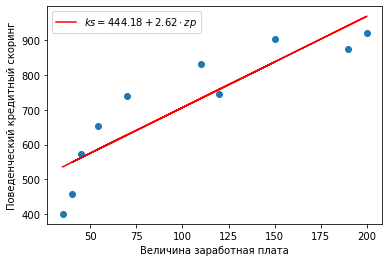

In [6]:
plt.scatter(zp,ks)
plt.plot(zp, 444.18+2.62*zp, c='r', label=r'$ks=444.18+2.62\cdot zp$')
plt.legend()
plt.xlabel('Величина заработная плата')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

In [16]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [17]:
ks=ks.reshape((-1,1))
zp=zp.reshape((-1,1))

In [18]:
B=np.dot(np.linalg.inv(np.dot(zp.T,zp)),np.dot(zp.T,ks))
B

array([[5.88982042]])

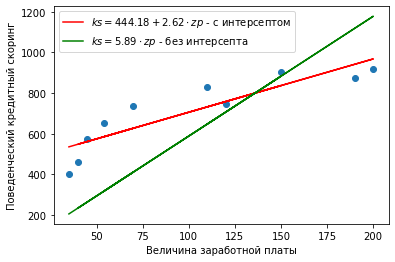

In [19]:
plt.scatter(zp,ks)
plt.plot(zp, 444.18+2.62*zp, c='r', label=r'$ks=444.18+2.62\cdot zp$ - с интерсептом')
plt.plot(zp, B*zp, c='g', label=r'$ks=5.89\cdot zp$ - без интерсепта')
plt.legend()
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

#### 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept). 

In [24]:
def mse(b, x, y):
    return np.sum((b * x - y) ** 2) / len(x)

In [25]:
def mse_der(b, x, y):
    return (2 / len(x)) * np.sum((b * x - y) * x)

In [26]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [27]:
mse(2.62, zp, ks)

203812.48504

In [28]:
alpha=1e-06

In [29]:
b = 0.1
mse_min = mse(b,zp,ks)
i_min = 1
b_min = b
for i in range(10000):
    b -= alpha * mse_der(b,zp,ks)
    if i % 100 == 0:
        print(f'Итерация #{i}, b={b}, mse={mse(b, zp, ks)}')
    if mse(b, zp, ks) > mse_min:
        print(f'Итерация #{i_min}, b={b_min}, mse={mse_min},\nДостигнут минимум.')
        break
    else:
        mse_min = mse(b, zp, ks)
        i_min = i
        b_min = b

Итерация #0, b=0.25952808000000005, mse=493237.7212546963
Итерация #100, b=5.54537842245223, mse=58151.31823171113
Итерация #200, b=5.868748638669329, mse=56522.97550129376
Итерация #300, b=5.888531320728348, mse=56516.88130936019
Итерация #400, b=5.8897415574471985, mse=56516.85850140053
Итерация #500, b=5.889815595583751, mse=56516.858416040064
Итерация #600, b=5.889820124983314, mse=56516.85841572062
Итерация #628, b=5.889820285147628, mse=56516.85841571966,
Достигнут минимум.


In [30]:
b_min

5.889820285147628